In this notebook we quickly check the output of data_proc_T.py to see how the data looks like. That data is later used to generate the mat file 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from cplAE_MET.preproc.data_proc_T import set_paths

# This is used to be able to run the notebook both remote and locally
Allen_dir = "/allen/programs/celltypes/workgroups/rnaseqanalysis/Fahimehb/git_workspace/cplAE_MET/data/"
remote_dir = "/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/"

### Read the config file to set the paths

In [2]:
pth = set_paths(config_file='config_preproc.toml')

In [3]:
pth.keys()

dict_keys(['package_dir', 'specimen_ids_file', 'gene_file', 't_data_output_file', 't_anno_output_file', 'gene_id_output_file', 'm_data_folder', 'm_anno', 'hist2d_120x4_folder', 'm_output_file', 'E_timeseries_file', 'ipfx_features_file', 'e_output_file', 'met_output_file', 'config_file', 'input', 'output', 'specimen_ids', 't_anno', 't_data', 't_data_output', 't_anno_output', 'gene_id_output'])

### Read T anno and data 
For 30Mar22 mat file, I used the following shiny:
- "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_20220113_collapsed40_cpm/data.feather"
- "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_20220113_collapsed40_cpm/anno.feather"

Lets read and analyze the output of data_proc_T.py

In [6]:
# anno and data file output of data_proc_T.py
T_dat = pd.read_csv(pth['t_data_output'])
T_ann = pd.read_csv(pth['t_anno_output'])

print(T_dat.shape, T_ann.shape)

(6570, 1253) (6570, 6)


In [7]:
# specimen ids of all the cells, even if the cell does not have T data available
spec_ids = pd.read_csv(pth['specimen_ids']).drop(columns=["Unnamed: 0"])

In [10]:
spec_ids

,specimen_id,T_cell,M_cell,E_cell
0,823231829,1.0,0.0,1.0
1,893406540,1.0,0.0,1.0
2,896877084,1.0,0.0,1.0
3,912008949,1.0,0.0,1.0
4,921685533,1.0,1.0,1.0
...,...,...,...,...
6565,912896324,0.0,1.0,0.0
6566,927889009,0.0,1.0,0.0
6567,601790961,0.0,1.0,0.0
6568,639818525,0.0,1.0,0.0


In [11]:
# How many T cells
t_cells = spec_ids[spec_ids['T_cell']==1.0].shape[0]
not_t_cells = spec_ids.shape[0] - t_cells
print("There are ", t_cells ," cells that have  T")
print("There are ", not_t_cells ," cells that have other madalities but not T")

There are  6510  cells that have  T
There are  60  cells that have other madalities but not T


In [12]:
# Check how many Core, I1, I2, I3, PoorQ
# If some cells don't have T data available, the have put all the meta_data equal to nan for those cells

Counter(T_ann['Tree_call_label'])

Counter({'Core': 3832, 'I1': 1273, 'I2': 1260, 'I3': 145, nan: 60})

In [16]:
# T_data
T_dat = T_dat.set_index("specimen_id")
T_dat

,Lhx6,Gad2,Slc32a1,Neurod2,Slc6a1,Gad1,Adarb2,Sv2b,Nrn1,Slc17a7,...,Adrb1,Chst1,Trps1,2610100L16Rik,Gnaz,Pth2r,Ier5l,Cmya5,Coro2a,Spsb4
specimen_id,,,,,,,,,,,,,,,,,,,,,
823231829,0.0,0.00000,0.0,3.314892,4.151198,0.0,0.000000,5.927228,4.655706,6.119575,...,2.348631,4.836442,3.083591,0.000000,3.684671,0.0,0.666352,3.166779,1.566215,0.0
893406540,0.0,1.09609,0.0,4.450606,0.000000,0.0,0.000000,5.575958,4.427076,5.620245,...,3.824938,4.611372,4.518044,5.489291,3.174426,0.0,1.788606,0.000000,0.000000,0.0
896877084,0.0,0.00000,0.0,1.876337,4.836025,0.0,2.287194,3.990531,6.000302,4.389814,...,3.392951,5.331263,0.000000,0.000000,3.948775,0.0,5.442543,0.000000,0.000000,0.0
912008949,0.0,0.00000,0.0,4.127892,0.000000,0.0,0.654902,5.706064,5.200518,5.278958,...,4.567160,1.547524,4.365595,4.279738,2.970368,0.0,2.759964,2.128189,3.257087,0.0
921685533,0.0,0.00000,0.0,4.668216,4.640049,0.0,0.000000,5.554353,6.490263,5.954698,...,2.184749,4.355581,4.845876,3.318664,3.993544,0.0,0.000000,0.000000,3.747483,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912896324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927889009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601790961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'logcpm')

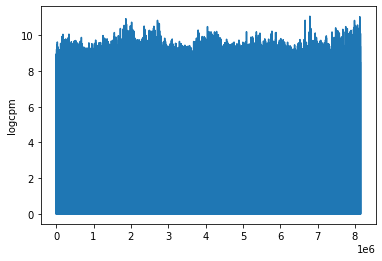

In [28]:
# Lets plot T data to check if they are logcpm
plt.plot(np.array(T_dat).flatten())
plt.ylabel("logcpm")
